In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import ast
import os

In [2]:
def edit_distance(str1, str2):
    m = len(str1)
    r = len(str2)

    # Create a DP table to store results of subproblems
    dp = [[0 for x in range(r + 1)] for x in range(m + 1)]

    # Fill dp[][] in bottom up manner
    for i in range(m + 1):
        for j in range(r + 1):
            # If first string is empty, only option is to
            # insert all characters of second string
            if i == 0:
                dp[i][j] = j  # Min. operations = j

            # If second string is empty, only option is to
            # remove all characters of first string
            elif j == 0:
                dp[i][j] = i  # Min. operations = i

            # If last characters are the same, ignore the last character
            # and recur for the remaining substring
            elif str1[i - 1] == str2[j - 1]:
                dp[i][j] = dp[i - 1][j - 1]

            # If the last character is different, consider all
            # possibilities and find the minimum
            else:
                dp[i][j] = 1 + min(dp[i][j - 1],    # Insert
                                   dp[i - 1][j],    # Remove
                                   dp[i - 1][j - 1])  # Replace

    return dp[m][r]

In [3]:
!pwd

/home/not81yan/km_predict_proj/Model/refined_model


In [4]:
os.chdir("./..")

In [5]:
!pwd

/home/not81yan/km_predict_proj/Model


In [6]:
split_ratio = 0.2

path = '/../Dataset/brenda_analyse/'

df = pd.read_csv(os.getcwd()+path+'total_esm.csv')


In [7]:
df

,proteins,substrate,change,mutation,uniprot,num_value_gm,num_value_am,EC_ID,seq_str,esm,label
0,103,ethanol,-,-,Q6L0S1,0.05600,0.056000,1.1.1.1,MRAIVLERFGIENIKIEDIDDESPGIPVKITMAGLNPVDYSTVNGN...,"[0.03474235162138939, 0.2059604674577713, -0.0...",Q6L0S1|-
1,109,(R)-2-butanol,-,-,P39462,0.41000,0.410000,1.1.1.1,MRAVRLVEIGKPLSLQEIGVPKPKGPQVLIKVEAAGVCHSDVHMRQ...,"[-0.028647541999816895, 0.27127352356910706, -...",P39462|-
2,109,(R)-2-pentanol,-,-,P39462,0.22000,0.220000,1.1.1.1,MRAVRLVEIGKPLSLQEIGVPKPKGPQVLIKVEAAGVCHSDVHMRQ...,"[-0.028647541999816895, 0.27127352356910706, -...",P39462|-
3,109,(S)-2-butanol,-,-,P39462,0.01200,0.012000,1.1.1.1,MRAVRLVEIGKPLSLQEIGVPKPKGPQVLIKVEAAGVCHSDVHMRQ...,"[-0.028647541999816895, 0.27127352356910706, -...",P39462|-
4,109,(S)-2-pentanol,-,-,P39462,0.07000,0.070000,1.1.1.1,MRAVRLVEIGKPLSLQEIGVPKPKGPQVLIKVEAAGVCHSDVHMRQ...,"[-0.028647541999816895, 0.27127352356910706, -...",P39462|-
...,...,...,...,...,...,...,...,...,...,...,...
24669,45,doxorubicin/in,-,-,P32010,0.00039,0.000390,7.6.2.2,MNTQPTRAIETSGLVKVYNGTRAVDGLDLNVPAGLVYGILGPNGAG...,"[0.027594290673732758, -0.005160156171768904, ...",P32010|-
24670,45,ethidium bromide/in,-,-,P32010,0.02100,0.021000,7.6.2.2,MNTQPTRAIETSGLVKVYNGTRAVDGLDLNVPAGLVYGILGPNGAG...,"[0.027594290673732758, -0.005160156171768904, ...",P32010|-
24671,7,betaine,-,-,Q0PCR9,0.06059,0.099604,7.6.2.9,MVKQSKRPDFEEELLEEQPERYPGDTNFQKWGFDLHPQVAPISGGL...,"[-0.07006286829710007, 0.04701963812112808, 0....",Q0PCR9|-
24672,8,ATP,-,-,P46920,0.60000,0.600000,7.6.2.9,MSVDEKPIKIKVEKVSKIFGKQTKKAVQMLANGKTKKEILKATGST...,"[-0.0034434550907462835, 0.10536539554595947, ...",P46920|-


In [8]:
new_df = df.copy()

In [22]:
df = new_df.copy()
df['seq_str'] = df['seq_str'].astype(str)
df['substrate'] = df['substrate'].astype(str)
df['esm'] = df['esm'].apply(ast.literal_eval)
df['SUBSTRATE_ID'] = 0

# #make a new column called REF
df['REF'] = 0
df['SEQ_ID'] = 0

print(df.dtypes)

substrate_id = {}
inv_substrate_id = {}
for i, substrate in enumerate(df['substrate'].unique()):
    substrate_id[substrate] = i
    inv_substrate_id[i] = substrate
seq2id = {}
id2seq = {}
for i, seq in enumerate(df['seq_str'].unique()):
    seq2id[seq] = i
    id2seq[i] = seq

for i in range(len(df)):
    df.loc[i, 'SUBSTRATE_ID'] = int(substrate_id[str(df.loc[i, 'substrate'])])
    df.loc[i, 'SEQ_ID'] = int(seq2id[str(df.loc[i, 'seq_str'])])


proteins          int64
substrate        object
change           object
mutation         object
uniprot          object
num_value_gm    float64
num_value_am    float64
EC_ID            object
seq_str          object
esm              object
label            object
SUBSTRATE_ID      int64
REF               int64
SEQ_ID            int64
dtype: object


In [23]:
df

,proteins,substrate,change,mutation,uniprot,num_value_gm,num_value_am,EC_ID,seq_str,esm,label,SUBSTRATE_ID,REF,SEQ_ID
0,103,ethanol,-,-,Q6L0S1,0.05600,0.056000,1.1.1.1,MRAIVLERFGIENIKIEDIDDESPGIPVKITMAGLNPVDYSTVNGN...,"[0.03474235162138939, 0.2059604674577713, -0.0...",Q6L0S1|-,0,0,0
1,109,(R)-2-butanol,-,-,P39462,0.41000,0.410000,1.1.1.1,MRAVRLVEIGKPLSLQEIGVPKPKGPQVLIKVEAAGVCHSDVHMRQ...,"[-0.028647541999816895, 0.27127352356910706, -...",P39462|-,1,0,1
2,109,(R)-2-pentanol,-,-,P39462,0.22000,0.220000,1.1.1.1,MRAVRLVEIGKPLSLQEIGVPKPKGPQVLIKVEAAGVCHSDVHMRQ...,"[-0.028647541999816895, 0.27127352356910706, -...",P39462|-,2,0,1
3,109,(S)-2-butanol,-,-,P39462,0.01200,0.012000,1.1.1.1,MRAVRLVEIGKPLSLQEIGVPKPKGPQVLIKVEAAGVCHSDVHMRQ...,"[-0.028647541999816895, 0.27127352356910706, -...",P39462|-,3,0,1
4,109,(S)-2-pentanol,-,-,P39462,0.07000,0.070000,1.1.1.1,MRAVRLVEIGKPLSLQEIGVPKPKGPQVLIKVEAAGVCHSDVHMRQ...,"[-0.028647541999816895, 0.27127352356910706, -...",P39462|-,4,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24669,45,doxorubicin/in,-,-,P32010,0.00039,0.000390,7.6.2.2,MNTQPTRAIETSGLVKVYNGTRAVDGLDLNVPAGLVYGILGPNGAG...,"[0.027594290673732758, -0.005160156171768904, ...",P32010|-,8041,0,8318
24670,45,ethidium bromide/in,-,-,P32010,0.02100,0.021000,7.6.2.2,MNTQPTRAIETSGLVKVYNGTRAVDGLDLNVPAGLVYGILGPNGAG...,"[0.027594290673732758, -0.005160156171768904, ...",P32010|-,8042,0,8318
24671,7,betaine,-,-,Q0PCR9,0.06059,0.099604,7.6.2.9,MVKQSKRPDFEEELLEEQPERYPGDTNFQKWGFDLHPQVAPISGGL...,"[-0.07006286829710007, 0.04701963812112808, 0....",Q0PCR9|-,2681,0,8319
24672,8,ATP,-,-,P46920,0.60000,0.600000,7.6.2.9,MSVDEKPIKIKVEKVSKIFGKQTKKAVQMLANGKTKKEILKATGST...,"[-0.0034434550907462835, 0.10536539554595947, ...",P46920|-,1197,0,8320


In [106]:
df['REF'] = 0
for i in range(len(df)):
    if df.loc[i,'change']=='-':
        df.loc[i,'REF']=1


In [107]:
for i in range(len(df)):
    if df.loc[i,'change'] != '-':
        print(df.loc[i,'REF'])
        break

0


In [108]:
df.dtypes

proteins          int64
substrate        object
change           object
mutation         object
uniprot          object
num_value_gm    float64
num_value_am    float64
EC_ID            object
seq_str          object
esm              object
label            object
SUBSTRATE_ID      int64
REF               int64
SEQ_ID            int64
dtype: object

In [109]:
#save these dictionaries as json
path = os.getcwd() + '/refined_model/data/'

with open(path + 'substrate_id.json', 'w') as f:
    json.dump(substrate_id, f)

with open(path + 'inv_substrate_id.json', 'w') as f:
    json.dump(inv_substrate_id, f)
    
with open(path + 'seq2id.json', 'w') as f:
    json.dump(seq2id, f)

with open(path + 'id2seq.json', 'w') as f:
    json.dump(id2seq, f)

In [110]:
groups = df.groupby(['EC_ID', 'SUBSTRATE_ID'])


In [111]:
df

,proteins,substrate,change,mutation,uniprot,num_value_gm,num_value_am,EC_ID,seq_str,esm,label,SUBSTRATE_ID,REF,SEQ_ID
0,103,ethanol,-,-,Q6L0S1,0.05600,0.056000,1.1.1.1,MRAIVLERFGIENIKIEDIDDESPGIPVKITMAGLNPVDYSTVNGN...,"[0.03474235162138939, 0.2059604674577713, -0.0...",Q6L0S1|-,0,1,0
1,109,(R)-2-butanol,-,-,P39462,0.41000,0.410000,1.1.1.1,MRAVRLVEIGKPLSLQEIGVPKPKGPQVLIKVEAAGVCHSDVHMRQ...,"[-0.028647541999816895, 0.27127352356910706, -...",P39462|-,1,1,1
2,109,(R)-2-pentanol,-,-,P39462,0.22000,0.220000,1.1.1.1,MRAVRLVEIGKPLSLQEIGVPKPKGPQVLIKVEAAGVCHSDVHMRQ...,"[-0.028647541999816895, 0.27127352356910706, -...",P39462|-,2,1,1
3,109,(S)-2-butanol,-,-,P39462,0.01200,0.012000,1.1.1.1,MRAVRLVEIGKPLSLQEIGVPKPKGPQVLIKVEAAGVCHSDVHMRQ...,"[-0.028647541999816895, 0.27127352356910706, -...",P39462|-,3,1,1
4,109,(S)-2-pentanol,-,-,P39462,0.07000,0.070000,1.1.1.1,MRAVRLVEIGKPLSLQEIGVPKPKGPQVLIKVEAAGVCHSDVHMRQ...,"[-0.028647541999816895, 0.27127352356910706, -...",P39462|-,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24669,45,doxorubicin/in,-,-,P32010,0.00039,0.000390,7.6.2.2,MNTQPTRAIETSGLVKVYNGTRAVDGLDLNVPAGLVYGILGPNGAG...,"[0.027594290673732758, -0.005160156171768904, ...",P32010|-,8041,1,8318
24670,45,ethidium bromide/in,-,-,P32010,0.02100,0.021000,7.6.2.2,MNTQPTRAIETSGLVKVYNGTRAVDGLDLNVPAGLVYGILGPNGAG...,"[0.027594290673732758, -0.005160156171768904, ...",P32010|-,8042,1,8318
24671,7,betaine,-,-,Q0PCR9,0.06059,0.099604,7.6.2.9,MVKQSKRPDFEEELLEEQPERYPGDTNFQKWGFDLHPQVAPISGGL...,"[-0.07006286829710007, 0.04701963812112808, 0....",Q0PCR9|-,2681,1,8319
24672,8,ATP,-,-,P46920,0.60000,0.600000,7.6.2.9,MSVDEKPIKIKVEKVSKIFGKQTKKAVQMLANGKTKKEILKATGST...,"[-0.0034434550907462835, 0.10536539554595947, ...",P46920|-,1197,1,8320


In [ ]:
sims = []
mlens = []
dists = []
num_ref = 0
num_grps = 0
tst = 0
trn = 0
tn = []
ts = []

gs = []
ref_lens = []
non_ref_lens = []

for name, group in groups:
    num_grps += 1
    if num_grps % 100 == 0:
        print('Number of groups done:', num_grps)
        
    if len(group)<2:
        continue
    group.reset_index(drop=True, inplace=True)
    subs_name = name
    ref_group = group[group['REF'] == 1]
    non_ref_group = group[group['REF'] == 0]
    ref_group.reset_index(drop=True, inplace=True)
    non_ref_group.reset_index(drop=True, inplace=True)
    ref_lens.append(len(ref_group))
    non_ref_lens.append(len(non_ref_group))
    gs.append(len(group))
    prs_train = []
    prs_test = []
    for i in range(len(non_ref_group)):
        if tst/(0.000001+trn)>0.25:
            flag = 1
        else:
            flag = 0
        for j in range(len(ref_group)):
            entry = {}
            entry['EC_ID'] = name[0]
            entry['SUBSTRATE_ID'] = int(non_ref_group.loc[i, 'SUBSTRATE_ID'])
            entry['CHANGE_REF'] = ref_group.loc[j, 'change']
            entry['CHANGE_MUT'] = non_ref_group.loc[i, 'change']
            entry['SEQ_REF_ID'] = int(ref_group.loc[j, 'SEQ_ID'])
            entry['SEQ_MUT_ID'] = int(non_ref_group.loc[i, 'SEQ_ID'])
            entry['ESM_REF'] = ref_group.loc[j, 'esm']
            entry['ESM_MUT_delta'] = list(np.array(non_ref_group.loc[i, 'esm']) - np.array(ref_group.loc[j, 'esm']))
            entry['KM_REF'] = ref_group.loc[j, 'num_value_gm']
            entry['KM_MUT'] = non_ref_group.loc[i, 'num_value_gm']
            seq1 = ref_group.loc[j,'seq_str']
            seq2 = non_ref_group.loc[i,'seq_str']
            dist = edit_distance(seq1,seq2)
            sim = 1 - dist/min(len(seq1),len(seq2))
            sims.append(sim)
            dists.append(dist)
            mlens.append(min(len(seq1),len(seq2)))
            
            if flag:
                prs_train.append(entry)
                trn+=1
            else:
                prs_test.append(entry)
                tst+=1
            
    if len(prs_test) != 0:
        ts.append(prs_test)
    if len(prs_train) != 0:
        tn.append(prs_train)
    for i in range(len(ref_group)):
        if tst/(0.000001+trn)>0.25:
            flag = 1
        else:
            flag = 0
        for j in range(i+1,len(ref_group)):
            entry = {}
            entry['EC_ID'] = name[0]
            entry['SUBSTRATE_ID'] = int(ref_group.loc[i, 'SUBSTRATE_ID'])
            entry['CHANGE_REF'] = str(ref_group.loc[j, 'change'])
            entry['CHANGE_MUT'] = str(ref_group.loc[i, 'change'])
            entry['SEQ_REF_ID'] = int(ref_group.loc[j, 'SEQ_ID'])
            entry['SEQ_MUT_ID'] = int(ref_group.loc[i, 'SEQ_ID'])
            entry['ESM_REF'] = ref_group.loc[j, 'esm']
            entry['ESM_MUT_delta'] = list(np.array(ref_group.loc[i, 'esm']) - np.array(ref_group.loc[j, 'esm']))
            entry['KM_REF'] = ref_group.loc[j, 'num_value_gm']
            entry['KM_MUT'] = ref_group.loc[i, 'num_value_gm']
            seq1 = ref_group.loc[j,'seq_str']
            seq2 = ref_group.loc[i,'seq_str']
            dist = edit_distance(seq1,seq2)
            sim = 1 - (dist/min(len(seq1),len(seq2)))
            sims.append(sim)
            dists.append(dist)
            mlens.append(min(len(seq1),len(seq2)))                       
            if flag:
                prs_train.append(entry)
                trn+=1
            else:
                prs_test.append(entry)
                tst+=1
    if len(prs_test) != 0:
        ts.append(prs_test)
    if len(prs_train) != 0:
        tn.append(prs_train)   
    

Number of groups done: 100
Number of groups done: 200
Number of groups done: 300
Number of groups done: 400
Number of groups done: 500
Number of groups done: 600
Number of groups done: 700
Number of groups done: 800
Number of groups done: 900
Number of groups done: 1000
Number of groups done: 1100
Number of groups done: 1200
Number of groups done: 1300
Number of groups done: 1400
Number of groups done: 1500


In [ ]:
len(tn), len(ts)

In [ ]:
train = pd.DataFrame(columns=['EC_ID','SUBSTRATE_ID','CHANGE_REF','CHANGE_MUT','SEQ_REF_ID','SEQ_MUT_ID','ESM_REF','ESM_MUT_delta', 'KM_REF', 'KM_MUT'])
test = pd.DataFrame(columns=['EC_ID','SUBSTRATE_ID','CHANGE_REF','CHANGE_MUT','SEQ_REF_ID','SEQ_MUT_ID','ESM_REF','ESM_MUT_delta', 'KM_REF', 'KM_MUT'])

for x in tn:
    for y in x:
        train = train.append(y, ignore_index=True)
for x in ts:
    for y in x:
        test = test.append(y, ignore_index=True)
        

print(f"The train pairs are {len(train)}")
print(f"The test pairs are {len(test)}")


In [103]:
def check(df):
    df_ww = df[(df['CHANGE_REF'] != '-') & (df['CHANGE_MUT'] != '-')]
    print(len(df_ww))
check(train)

159


In [ ]:
train

In [ ]:
test

In [ ]:
!pwd

In [ ]:
#sort the train and test dataframes with respect to EC_ID and SUBSTRATE_ID
# train = train.sort_values(by=['EC_ID', 'SUBSTRATE_ID'])
# test = test.sort_values(by=['EC_ID', 'SUBSTRATE_ID'])

#save the train and test dataframes
# train.drop(columns=['UNIPROT_REF','UNIPROT_MUT','SEQ_REF','SEQ_MUT'], inplace=True)
train.to_csv(path + 'train_pairs_idx.csv', index=False)

test.to_csv(path + 'test_pairs_idx.csv', index=False)

  

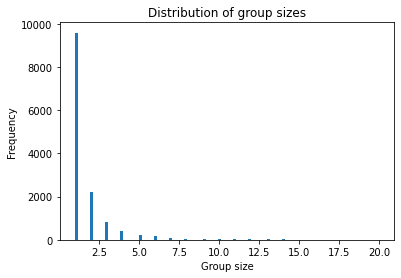

In [70]:
#Plot a histogram for group sizes
group_sizes = []
for name, group in groups:
    if len(group) > 20:
        continue
    group_sizes.append(len(group))
plt.hist(group_sizes, bins=100)
plt.xlabel('Group size')
plt.ylabel('Frequency')
plt.title('Distribution of group sizes')
plt.savefig(path + 'group_sizes.png')

In [71]:
arr = np.array(dist)/np.array(mlens)
sim_ = 1 - arr

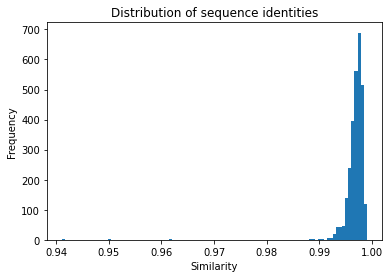

In [72]:
plt.hist(sim_, bins=100)
plt.xlabel('Similarity')
plt.ylabel('Frequency')
plt.title('Distribution of sequence identities')
plt.savefig(path + 'sims.png')

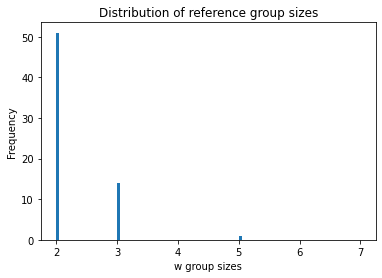

In [98]:
plt.hist(ref_lens, bins=100, range = (2,7))
plt.xlabel('w group sizes')
plt.ylabel('Frequency')
plt.title('Distribution of reference group sizes')
plt.savefig(path + 'ref_group_sizes.png')

In [74]:
print('Number of unique substrates:', len(substrate_id))
print('Number of unique EC_ID:', len(df['EC_ID'].unique()))
print('Number of unique EC_ID in train:', len(train['EC_ID'].unique()))
print('Number of unique EC_ID in test:', len(test['EC_ID'].unique()))

print('Number of unique substrates in train:', len(train['SUBSTRATE_ID'].unique()))
print('Number of unique substrates in test:', len(test['SUBSTRATE_ID'].unique()))

print('Number of unique pairs in train:', len(train))
print('Number of unique pairs in test:', len(test))

Number of unique substrates: 8043
Number of unique EC_ID: 2967
Number of unique EC_ID in train: 239
Number of unique EC_ID in test: 181
Number of unique substrates in train: 370
Number of unique substrates in test: 202
Number of unique pairs in train: 4531
Number of unique pairs in test: 1123


In [75]:
print('Done!')

Done!


In [76]:
len(seq2id)

8322

In [77]:
train.columns

Index(['EC_ID', 'SUBSTRATE_ID', 'CHANGE_REF', 'CHANGE_MUT', 'SEQ_REF_ID',
       'SEQ_MUT_ID', 'ESM_REF', 'ESM_MUT_delta', 'KM_REF', 'KM_MUT'],
      dtype='object')

In [78]:
train.dtypes

EC_ID             object
SUBSTRATE_ID      object
CHANGE_REF        object
CHANGE_MUT        object
SEQ_REF_ID        object
SEQ_MUT_ID        object
ESM_REF           object
ESM_MUT_delta     object
KM_REF           float64
KM_MUT           float64
dtype: object

In [94]:
bad = 0
for i in range(len(gs)):
    if gs[i]>1:
        if ref_lens[i]==0:
            bad+=1
print(bad)

3665


In [55]:
def prepare_data(path):
    import ast
    df = pd.read_csv(path)
#     print(df.columns)
#     print(df.dtypes)
#     print(df['SEQ_REF_ID'].dtype)
#     print(type(df.loc[0,'SEQ_REF_ID']))
    #delete the columns that are not needed
    df = df.drop(columns=['EC_ID'])
    df['ESM_REF'] = df['ESM_REF'].apply(ast.literal_eval)  
    df['ESM_MUT_delta'] = df['ESM_MUT_delta'].apply(ast.literal_eval)
    df['KM_REF'] = df['KM_REF'].astype(float)
    df['SEQ_REF_ID'] = df['SEQ_REF_ID'].astype(int)
    df['SEQ_MUT_ID'] = df['SEQ_MUT_ID'].astype(int)
    df['SUBSTRATE_ID'] = df['SUBSTRATE_ID'].astype(int)
#     df['SEQ_REF_ID'] = df['SEQ_REF_ID'].apply(lambda x: int(x))
#     df['SEQ_MUT_ID'] = df['SEQ_MUT_ID'].apply(lambda x: int(x))
    df_ww = df[(df['CHANGE_REF'] == '-') & (df['CHANGE_MUT'] == '-')]
    df_ww.reset_index(drop=True, inplace=True)
    uniq_seq_ids = set()
    for row in df_ww.iterrows():
        uniq_seq_ids.add(row['SEQ_ID_REF'])
        uniq_seq_ids.add(row['SEQ_ID_MUT'])
    seq_ids = None
    seq_ids = list(uniq_seq_ids)
    return df, seq_ids



In [56]:
path = os.getcwd() + '/refined_model/data/train_pairs_idx.csv'
df1, ref_ids = prepare_data(path)

In [62]:
len(ref_ids)

0

In [60]:
def five_fold_split(df, ref_ids=None):
    import time
    start = time.time()
    # later assume that ec id and substrate id does not exist, and SEQ_REF and SEQ_MUT also do not exist
    # df = df.sort_values(by=['EC_ID', 'SUBSTRATE_ID'])
    #apply ast to ESM columms
    #train = pd.DataFrame(columns=['CHANGE_REF','CHANGE_MUT','SEQ_REF_ID','SEQ_MUT_ID','ESM_REF','ESM_MUT_delta', 'KM_REF', 'KM_MUT', 'LABEL'])
    fld_nums = [0,0,0,0,0]    
    #group by EC_ID and SUBSTRATE_ID
    # groups = df.groupby(['EC_ID', 'SUBSTRATE_ID'])
    
    folds = []
    for i in range(5):
        folds.append(pd.DataFrame(columns=['SUBSTRATE_ID','CHANGE_REF','CHANGE_MUT','SEQ_REF_ID','SEQ_MUT_ID','ESM_REF','ESM_MUT_delta', 'KM_REF', 'KM_MUT']))
    
    df_mw = df[(df['CHANGE_REF'] != '-') | (df['CHANGE_MUT'] != '-')]
    df_mw.reset_index(drop=True, inplace=True)
    #make 5 parts of the df_mw
    for i in range(len(df_mw)):
        folds[i%5] = folds[i%5].append(df_mw.loc[i], ignore_index=True)
        fld_nums[i%5] += 1
    
    df_ww = df[(df['CHANGE_REF'] == '-') & (df['CHANGE_MUT'] == '-')]
    df_ww.reset_index(drop=True, inplace=True)
    seq_ids = ref_ids
    for i in range(len(seq_ids)):
        fld_i = i%5
        fld_nums[fld_i] += 1
        for j in range(len(df_ww)):
            if df_ww.loc[j, 'SEQ_ID_MUT'] == seq_ids[i]:
                folds[fld_i] = folds[fld_i].append(df_ww.loc[j], ignore_index=True)
                
    folds_out = []
    for i in range(5):
        #keep only the the esm and km columns, delete the rest
        esm_ref = np.array(folds[i]['ESM_REF'].tolist())
        esm_mut_del = np.array(folds[i]['ESM_MUT_delta'].tolist())
        km_delta = np.array(folds[i]['KM_MUT'].tolist()) - np.array(folds[i]['KM_REF'].tolist())
        km_ref = np.array(folds[i]['KM_REF'].tolist())
        km_mut = np.array(folds[i]['KM_MUT'].tolist())
        subs_id = np.array(folds[i]['SUBSTRATE_ID'].tolist())
        print(f"The shape of esm_ref is {esm_ref.shape}")
        print(f"The shape of esm_mut_del is {esm_mut_del.shape}")
        print(f"The shape of km_delta is {km_delta.shape}")
        print(f"The shape of km_ref is {km_ref.shape}")
        print(f"The shape of km_mut is {km_mut.shape}")
        print(f"The shape of subs_id is {subs_id.shape}")
        
        
        #concatenate the esm columns
        esm = np.concatenate((esm_ref, esm_mut_del, subs_id.reshape((-1,1))), axis=1)
        folds_out.append((esm, km_delta, km_ref, km_mut))
        
        
    print(f"The number of entries in each fold are {len(folds[0])}, {len(folds[1])}, {len(folds[2])}, {len(folds[3])}, {len(folds[4])}")
    print(f"The total number of entries are {len(df)}")
    print(f"The total number of ww pairs are {len(df_ww)}")
    print(f"The total number of mw pairs are {len(df_mw)}")
    print(f"Total time taken is {time.time()-start}")
    return folds_out

In [61]:
folds = five_fold_split(df1,ref_ids)

The shape of esm_ref is (907, 1280)
The shape of esm_mut_del is (907, 1280)
The shape of km_delta is (907,)
The shape of km_ref is (907,)
The shape of km_mut is (907,)
The shape of subs_id is (907,)
The shape of esm_ref is (906, 1280)
The shape of esm_mut_del is (906, 1280)
The shape of km_delta is (906,)
The shape of km_ref is (906,)
The shape of km_mut is (906,)
The shape of subs_id is (906,)
The shape of esm_ref is (906, 1280)
The shape of esm_mut_del is (906, 1280)
The shape of km_delta is (906,)
The shape of km_ref is (906,)
The shape of km_mut is (906,)
The shape of subs_id is (906,)
The shape of esm_ref is (906, 1280)
The shape of esm_mut_del is (906, 1280)
The shape of km_delta is (906,)
The shape of km_ref is (906,)
The shape of km_mut is (906,)
The shape of subs_id is (906,)
The shape of esm_ref is (906, 1280)
The shape of esm_mut_del is (906, 1280)
The shape of km_delta is (906,)
The shape of km_ref is (906,)
The shape of km_mut is (906,)
The shape of subs_id is (906,)
The n

In [ ]:
n = int("1")

In [ ]:
n

Note

___
No threshold but all are above 0.95

The train pairs are 4532
The test pairs are 1126
